In [217]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  LabelEncoder
from sklearn import neighbors,metrics
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [218]:
#import the data file
data = pd.read_csv('loan_prediction_data.csv')
data.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [219]:
#checking for null values in dataset
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [220]:
#deleting the rows where the values are zero
data.dropna(subset=['Loan_Amount_Term'],inplace=True)

In [221]:
data.dropna(subset=['LoanAmount'],inplace=True)

In [222]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [223]:
#Deleting the loan ID column as it contains unique values and doesn't contribute in prediction
data.drop(['Loan_ID'],axis=1,inplace=True)

In [224]:
data.isnull().sum()

Gender               13
Married               2
Dependents           12
Education             0
Self_Employed        30
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [225]:
#saving the cleaned dataset for further model training
data.to_csv('loan_prediction_clean_data.csv', index=False)

Categorical variables: 7


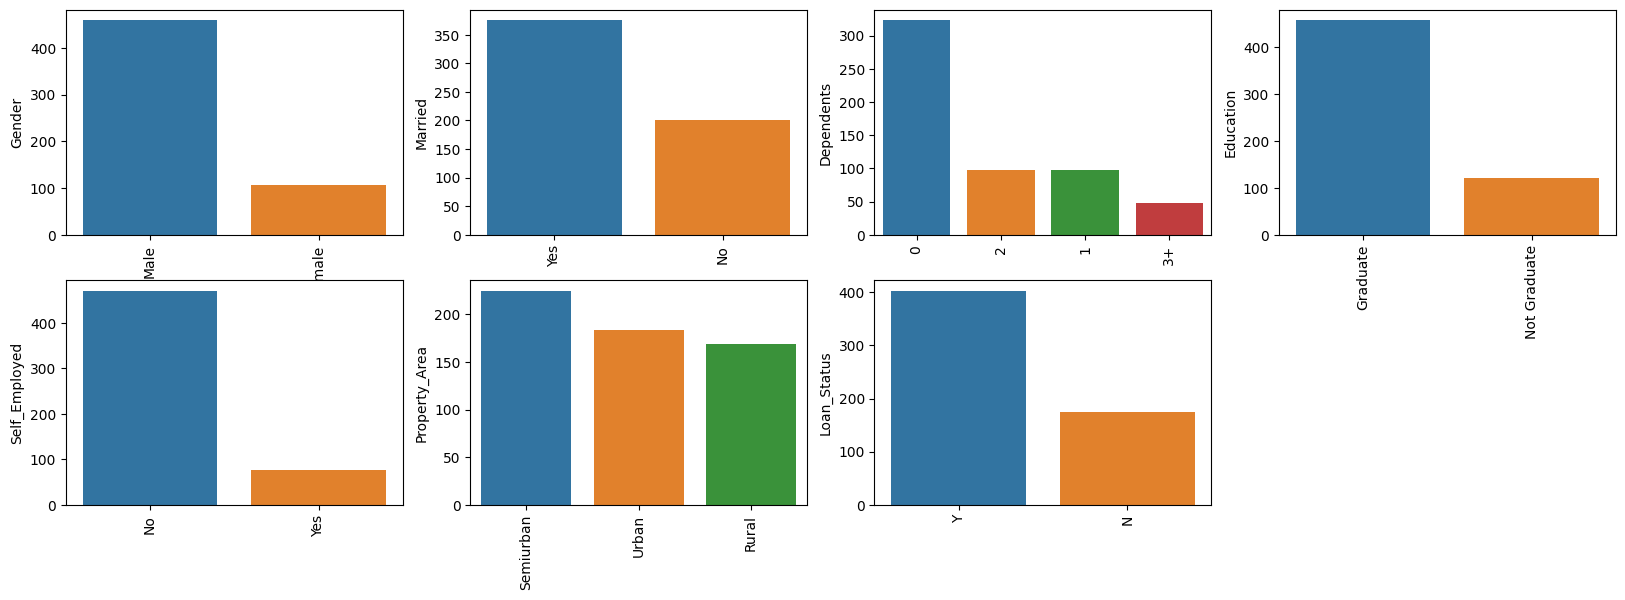

In [226]:
#differentiating object datatype values from numeric datatype values from dataset and then printing there count
obj = (data.dtypes == 'object') 
print("Categorical variables:",len(list(obj[obj].index)))


#plotting graphs for different types of parameters so as to count the number of values
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(20,38)) 
index = 1

for col in object_cols:
    y = data[col].value_counts() 
    plt.subplot(11,4,index) 
    plt.xticks(rotation=90) 
    sns.barplot(x=list(y.index), y=y) 
    index +=1


In [227]:
# using label encoder to convert string data type into integer for further model training purposes
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes=='object')
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

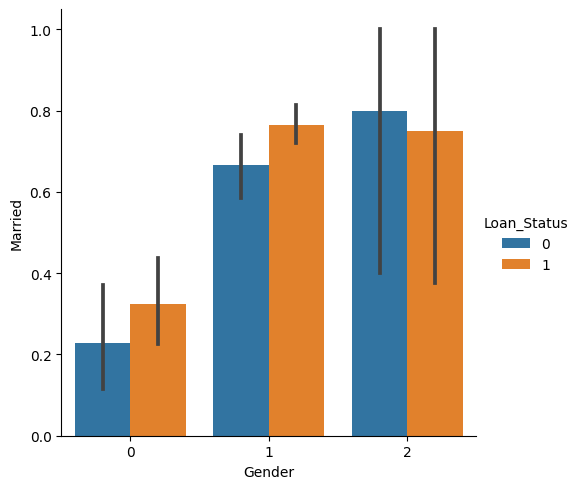

In [228]:
#exploring various relations between various parameters
sns.catplot(data=data,x='Gender',y='Married',hue='Loan_Status',kind='bar' );

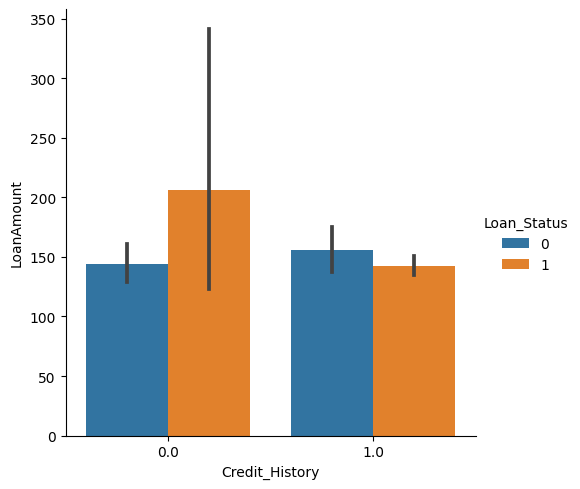

In [229]:
sns.catplot(data=data,x='Credit_History',y='LoanAmount',hue='Loan_Status',kind='bar' );

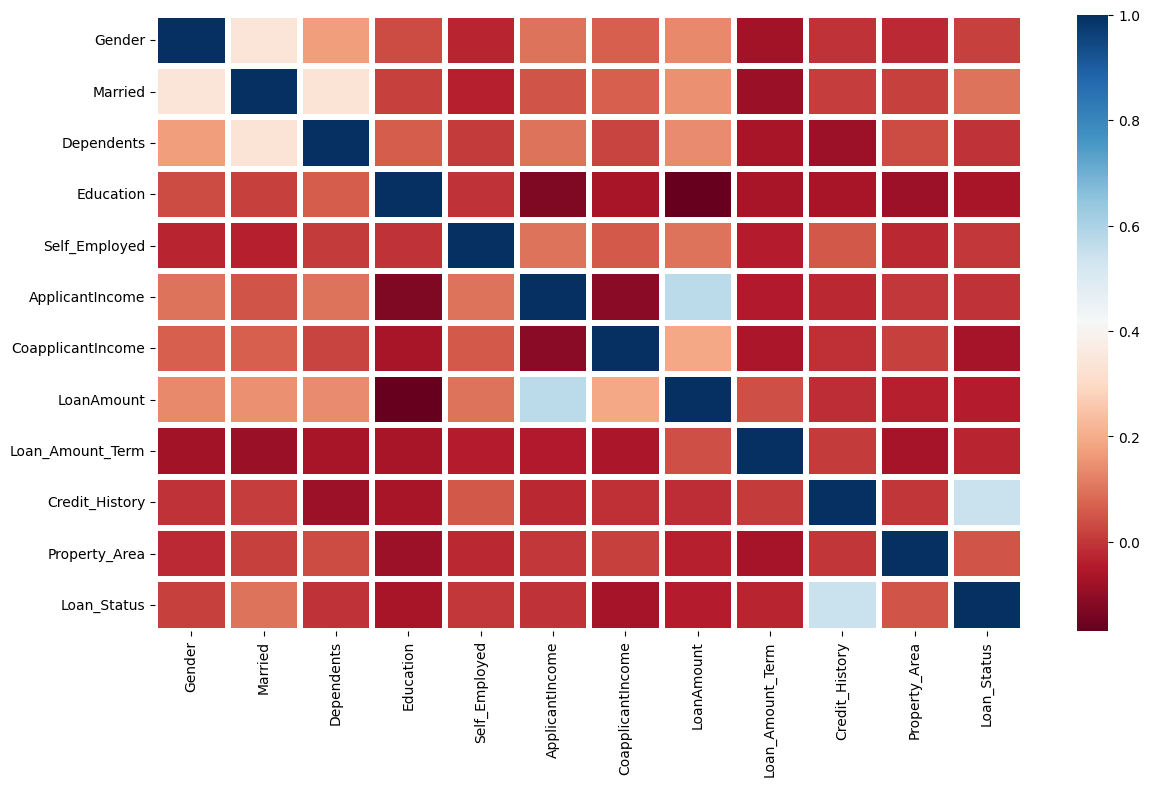

In [230]:
plt.figure(figsize=(14,8))   
sns.heatmap(data.corr(),cmap='RdBu', fmt='.4f', linewidths=3 , annot=False);

In [231]:
#insights from heatmap
#1 applicant income hugely depends on loan amount 
#2 credit history also depends on loan status

In [232]:
#to fill if any null value with mean of that column
for col in data.columns: 
    data[col] = data[col].fillna(data[col].mean()) 
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [233]:
#splitting data sets into features and labels for testing purposes
x = data[[
    'LoanAmount','ApplicantIncome','Credit_History'
]].values
y = data[['Loan_Status']]
print(x,y)

[[1.280e+02 4.583e+03 1.000e+00]
 [6.600e+01 3.000e+03 1.000e+00]
 [1.200e+02 2.583e+03 1.000e+00]
 ...
 [2.530e+02 8.072e+03 1.000e+00]
 [1.870e+02 7.583e+03 1.000e+00]
 [1.330e+02 4.583e+03 0.000e+00]]      Loan_Status
1              0
2              1
3              1
4              1
5              1
..           ...
609            1
610            1
611            1
612            1
613            0

[578 rows x 1 columns]


In [249]:
#firstly using KNN model for prediction with split ratio of 80/20
knn = neighbors.KNeighborsClassifier(n_neighbors=40,weights='uniform')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

accuracy = metrics.accuracy_score(y_test,prediction)

print("the predictions of the model are: ",prediction)
print('accuracy of the model is: ',accuracy*100)

the predictions of the model are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1]
accuracy of the model is:  73.27586206896551


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [240]:
#again training more models in order to get more accuracy with 80/20 split data

from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression 
from sklearn import metrics  

rfc = RandomForestClassifier(n_estimators = 7, 
                           criterion = 'entropy', 
                           random_state =7) 
svc = SVC() 

lc = LogisticRegression() 

# making predictions on the training set 
for clf in (rfc,svc,lc): 
    clf.fit(x_train, y_train) 
    y_pred = clf.predict(x_train)
    
    print("Accuracy score of ", clf.__class__.__name__, "=",
          100*metrics.accuracy_score(y_train,y_pred))


Accuracy score of  RandomForestClassifier = 97.39884393063583
Accuracy score of  SVC = 69.07514450867052
Accuracy score of  LogisticRegression = 73.121387283237


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [236]:
 # Split the data into training and testing sets with 80/20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
predictions = clf.predict(x_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy of the Decision Tree Classifier:", accuracy)

Accuracy of the Decision Tree Classifier: 0.7327586206896551


In [237]:
# Again training KNN model using data split of 60/40
knn = neighbors.KNeighborsClassifier(n_neighbors=40,weights='uniform')

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.4)

knn.fit(x_train,y_train)

prediction = knn.predict(x_test)

accuracy = metrics.accuracy_score(y_test,prediction)

print("the predictions of the model are: ",prediction)
print('accuracy of the model is: ',accuracy)

the predictions of the model are:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1]
accuracy of the model is:  0.7112068965517241


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [242]:
# training various models for best accuracy using 60/40 split

RFC = RandomForestClassifier(n_estimators = 7, 
                           criterion = 'entropy', 
                           random_state =7) 
svm = SVC() 

LR = LogisticRegression() 

# making predictions on the training set 
for testing in (RFC,svm,LR): 
    testing.fit(x_train, y_train) 
    y_pred = testing.predict(x_train)
    
    print("Accuracy score of ", testing.__class__.__name__, "=",
          100*metrics.accuracy_score(y_train,y_pred))

Accuracy score of  RandomForestClassifier = 97.39884393063583
Accuracy score of  SVC = 69.07514450867052
Accuracy score of  LogisticRegression = 73.121387283237


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [250]:
#From testing various ML models for loan status prediction dataset we conclude than 

# In 80/20 split dataset we get highest accuracy(~95.88%) from random forest classifier

# In 60/40 split dataset we get highest accuracy(~97.39%) from random forest classifier